In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [2]:
file = "../Resources/police_reports_clean.csv"

police_reports = pd.read_csv(file)
police_reports

,Incident Datetime,Incident Date,Incident Year,Incident Day of Week,Report Datetime,Report Type Description,Filed Online,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,Police District,Analysis Neighborhood,Latitude,Longitude,Incident Time,Report Time,Report Date
0,2021-08-03 10:00:00,2021-08-03,2021,Tuesday,2021-08-15 15:40:00,Initial,False,Fraud,Fraud,Fraudulent Use Of Automated Teller Card,Open or Active,04TH ST \ HOWARD ST,Southern,Financial District/South Beach,37.783259,-122.402708,10:00:00,15:40:00,2021-08-15
1,2021-11-23 07:38:00,2021-11-23,2021,Tuesday,2021-11-23 11:14:00,Initial,False,Arson,Arson,Arson,Open or Active,FILLMORE ST \ PAGE ST,Northern,Hayes Valley,37.773039,-122.430629,07:38:00,11:14:00,2021-11-23
2,2018-03-16 19:45:00,2018-03-16,2018,Friday,2018-03-16 23:30:00,Initial,False,Assault,Simple Assault,Battery,Open or Active,JONES ST \ POST ST,Central,Tenderloin,37.787664,-122.413354,19:45:00,23:30:00,2018-03-16
3,2019-09-03 08:25:00,2019-09-03,2019,Tuesday,2019-09-04 14:53:00,Initial,False,Lost Property,Lost Property,Lost Property,Open or Active,07TH ST \ BRANNAN ST,Southern,South of Market,37.773051,-122.403205,08:25:00,14:53:00,2019-09-04
4,2020-01-01 00:00:00,2020-01-01,2020,Wednesday,2021-06-23 13:49:00,Initial,False,Fraud,Fraud,"False Claims, Presenting to Government",Open or Active,47TH AVE \ WAWONA ST,Taraval,Sunset/Parkside,37.736135,-122.505297,00:00:00,13:49:00,2021-06-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411293,2021-05-19 15:00:00,2021-05-19,2021,Wednesday,2021-05-20 07:09:00,Vehicle Initial,False,Motor Vehicle Theft,Motor Vehicle Theft,"Vehicle, Stolen & Recovered",Open or Active,SANTIAGO ST \ 24TH AVE,Taraval,Sunset/Parkside,37.744681,-122.481181,15:00:00,07:09:00,2021-05-20
411294,2021-11-22 09:00:00,2021-11-22,2021,Monday,2021-11-24 13:29:00,Initial,False,Malicious Mischief,Vandalism,"Malicious Mischief, Vandalism to Vehicle",Open or Active,TAYLOR ST \ SACRAMENTO ST,Central,Nob Hill,37.792552,-122.412650,09:00:00,13:29:00,2021-11-24
411295,2021-08-13 00:10:00,2021-08-13,2021,Friday,2021-08-13 03:15:00,Initial,False,Non-Criminal,Non-Criminal,Found Property,Open or Active,TAYLOR ST \ POST ST,Central,Nob Hill,37.787872,-122.411699,00:10:00,03:15:00,2021-08-13
411296,2021-05-19 11:30:00,2021-05-19,2021,Wednesday,2021-05-19 11:36:00,Initial,False,Other Miscellaneous,Other,Investigative Detention,Open or Active,SELBY ST \ QUESADA AVE,Bayview,Bayview Hunters Point,37.738649,-122.400808,11:30:00,11:36:00,2021-05-19


In [3]:
police_reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411298 entries, 0 to 411297
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Incident Datetime        411298 non-null  object 
 1   Incident Date            411298 non-null  object 
 2   Incident Year            411298 non-null  int64  
 3   Incident Day of Week     411298 non-null  object 
 4   Report Datetime          411298 non-null  object 
 5   Report Type Description  411298 non-null  object 
 6   Filed Online             411298 non-null  bool   
 7   Incident Category        411298 non-null  object 
 8   Incident Subcategory     411298 non-null  object 
 9   Incident Description     411298 non-null  object 
 10  Resolution               411298 non-null  object 
 11  Intersection             411298 non-null  object 
 12  Police District          411298 non-null  object 
 13  Analysis Neighborhood    411298 non-null  object 
 14  Lati

In [4]:
# changing data types
police_reports["Incident Datetime"] = pd.to_datetime(police_reports["Incident Datetime"])
police_reports["Report Datetime"] = pd.to_datetime(police_reports["Report Datetime"])


In [5]:
police_reports["Incident Time"] = police_reports["Incident Datetime"].dt.time
police_reports["Report Time"] = police_reports["Report Datetime"].dt.time

police_reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411298 entries, 0 to 411297
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Incident Datetime        411298 non-null  datetime64[ns]
 1   Incident Date            411298 non-null  object        
 2   Incident Year            411298 non-null  int64         
 3   Incident Day of Week     411298 non-null  object        
 4   Report Datetime          411298 non-null  datetime64[ns]
 5   Report Type Description  411298 non-null  object        
 6   Filed Online             411298 non-null  bool          
 7   Incident Category        411298 non-null  object        
 8   Incident Subcategory     411298 non-null  object        
 9   Incident Description     411298 non-null  object        
 10  Resolution               411298 non-null  object        
 11  Intersection             411298 non-null  object        
 12  Police District 

In [6]:
# df showing incident reports prior to 2023
incident_report_no2023 = police_reports.loc[police_reports["Incident Year"]<2023]
# incident_report_no2023

In [7]:
# shows the number of days tracked in the data set
num_days = police_reports["Incident Date"].nunique()
num_days

1826

In [8]:
crime_count = police_reports["Incident Category"].value_counts()
crime_count

Larceny Theft                               95830
Assault                                     34404
Burglary                                    32509
Motor Vehicle Theft                         30823
Malicious Mischief                          29519
Non-Criminal                                27568
Other Miscellaneous                         27155
Fraud                                       18908
Robbery                                     13073
Suspicious Activity                         12316
Missing Person                              11985
Disorderly Conduct                           9195
Warrant                                      7800
Offences Against The Family And Children     7690
Lost Property                                7289
Recovered Vehicle                            6204
Drug Offense                                 5750
Miscellaneous Investigation                  5563
Other                                        4586
Weapons Offense                              3472


In [9]:
# using a groupby to turn this into a readable data frame
crime_counts = police_reports.groupby(["Incident Category"]).count()["Incident Datetime"]
crime_counts

Incident Category
Arson                                        1436
Assault                                     34404
Burglary                                    32509
Case Closure                                 1812
Civil Sidewalks                               132
Courtesy Report                              1740
Disorderly Conduct                           9195
Drug Offense                                 5750
Drug Violation                                 72
Embezzlement                                  791
Fire Report                                   625
Forgery And Counterfeiting                   1725
Fraud                                       18908
Gambling                                       11
Homicide                                       36
Human Trafficking                             110
Larceny Theft                               95830
Liquor Laws                                    24
Lost Property                                7289
Malicious Mischief              

In [10]:
incident_category_count = pd.DataFrame(crime_counts)
incident_category_count = incident_category_count.sort_values("Incident Datetime", ascending=False)
incident_category_count = incident_category_count.rename(columns = {"Incident Datetime": "Incident Count"})
incident_category_count

,Incident Count
Incident Category,
Larceny Theft,95830
Assault,34404
Burglary,32509
Motor Vehicle Theft,30823
Malicious Mischief,29519
Non-Criminal,27568
Other Miscellaneous,27155
Fraud,18908
Robbery,13073


In [11]:
subcategory_counts = police_reports["Incident Subcategory"].unique()
subcategory_counts

array(['Fraud', 'Arson', 'Simple Assault', 'Lost Property',
       'Missing Person', 'Other', 'Suspicious Occ',
       'Larceny - Auto Parts', 'Non-Criminal', 'Missing Adult',
       'Theft From Vehicle', 'Burglary - Residential', 'Trespass',
       'Fire Report', 'Suicide', 'Vandalism', 'Larceny - From Vehicle',
       'Intimidation', 'Burglary - Other', 'Robbery - Other',
       'Motor Vehicle Theft', 'Courtesy Report', 'Recovered Vehicle',
       'Rape', 'Robbery - Carjacking', 'Stalking', 'Case Closure',
       'Prostitution', 'Larceny Theft - Other',
       'Larceny Theft - Shoplifting', 'Burglary - Commercial',
       'Burglary - Hot Prowl', 'Aggravated Assault', 'Traffic Collision',
       'Warrant', 'Traffic Violation Arrest',
       'Larceny Theft - From Building', 'Robbery - Street', 'Sex Offense',
       'Drug Violation', 'Weapons Offense', 'Stolen Property',
       'Robbery - Commercial', 'Miscellaneous Investigation',
       'Larceny Theft - Bicycle', 'Other Offenses',
   

In [12]:
# may be useful information for future analysis
incident_type = police_reports["Report Type Description"].value_counts()
incident_type

Initial               334537
Vehicle Initial        38678
Initial Supplement     30172
Vehicle Supplement      7911
Name: Report Type Description, dtype: int64

In [13]:
num_days = police_reports["Incident Date"].nunique()
num_days

1826

In [14]:
police_districts = police_reports["Police District"].value_counts()
police_districts

Central       64553
Northern      52475
Mission       52102
Southern      50183
Bayview       38380
Ingleside     36274
Tenderloin    34952
Taraval       32676
Richmond      25251
Park          18998
Out of SF      5454
Name: Police District, dtype: int64

In [15]:
neighborhood = police_reports["Analysis Neighborhood"].value_counts()
neighborhood = pd.DataFrame(neighborhood)
neighborhood

,Analysis Neighborhood
Mission,43551
Tenderloin,36914
Financial District/South Beach,35342
South of Market,31370
Bayview Hunters Point,27596
Sunset/Parkside,13782
North Beach,13301
Western Addition,12451
Nob Hill,12137
Castro/Upper Market,12056


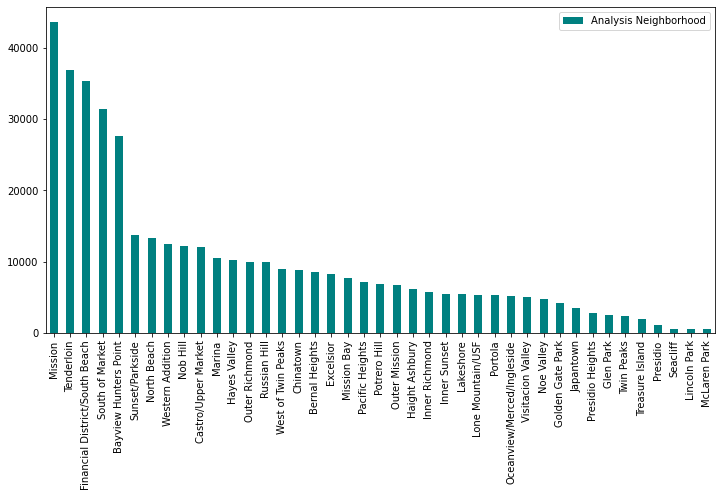

In [16]:
neighborhood.plot(kind = 'bar', figsize=(12,6), color='teal')

plt.show()

In [17]:
select_neighborhoods = neighborhood.loc[neighborhood.index.isin(['Mission', 'Tenderloin', 'Financial District/South Beach', 'South of Market', 'Bayview Hunters Point'])]
# 'Mission', ' Tenderloin','Financial District/South Beach', 'South of Market', 'Bayview Hunters Point'
# 'Presidio Heights','Glen Park', 'Twin Peaks' 'Presidio','Seacliff'

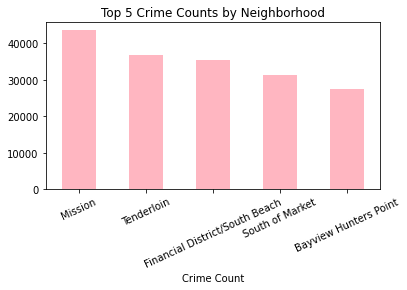

In [18]:
select_neighborhoods.plot(kind='bar', color = 'lightpink', legend=None)
plt.xticks(rotation=25)
plt.xlabel("Crime Count")
plt.title("Top 5 Crime Counts by Neighborhood")
plt.subplots_adjust(bottom=0.30)
plt.savefig("Output/top5neighborhoods.jpg")
plt.show()

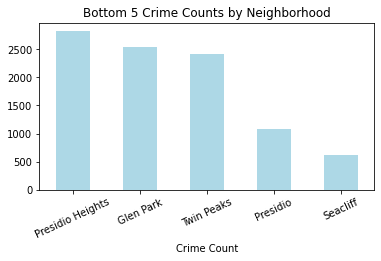

In [19]:
best_neighborhoods = neighborhood.loc[neighborhood.index.isin(['Presidio Heights','Glen Park', 'Twin Peaks', 'Presidio','Seacliff'])]
best_neighborhoods.plot(kind='bar', color = 'lightblue', legend=None)
plt.xticks(rotation=25)
plt.xlabel("Crime Count")
plt.title("Bottom 5 Crime Counts by Neighborhood")
plt.subplots_adjust(bottom=0.30)
plt.savefig("Output/bottom5neighborhoods.jpg")
plt.show()

In [20]:
num_neighborhood = police_reports["Analysis Neighborhood"].nunique()
num_neighborhood

41

In [21]:
resolution_count = police_reports["Resolution"].value_counts()
resolution_count

Open or Active          341243
Cite or Arrest Adult     66276
Unfounded                 2651
Exceptional Adult         1128
Name: Resolution, dtype: int64

In [22]:
# shows how long it took from the time the incident occurred to the time the report was filed
response_time = police_reports['Incident Datetime'] - police_reports['Report Datetime']
response_time

0         -13 days +18:20:00
1          -1 days +20:24:00
2          -1 days +20:15:00
3          -2 days +17:32:00
4        -540 days +10:11:00
                 ...        
411293     -1 days +07:51:00
411294     -3 days +19:31:00
411295     -1 days +20:55:00
411296     -1 days +23:54:00
411297     -1 days +23:48:00
Length: 411298, dtype: timedelta64[ns]

In [23]:
police_reports["Response Time"] = response_time
police_reports

,Incident Datetime,Incident Date,Incident Year,Incident Day of Week,Report Datetime,Report Type Description,Filed Online,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,Police District,Analysis Neighborhood,Latitude,Longitude,Incident Time,Report Time,Report Date,Response Time
0,2021-08-03 10:00:00,2021-08-03,2021,Tuesday,2021-08-15 15:40:00,Initial,False,Fraud,Fraud,Fraudulent Use Of Automated Teller Card,Open or Active,04TH ST \ HOWARD ST,Southern,Financial District/South Beach,37.783259,-122.402708,10:00:00,15:40:00,2021-08-15,-13 days +18:20:00
1,2021-11-23 07:38:00,2021-11-23,2021,Tuesday,2021-11-23 11:14:00,Initial,False,Arson,Arson,Arson,Open or Active,FILLMORE ST \ PAGE ST,Northern,Hayes Valley,37.773039,-122.430629,07:38:00,11:14:00,2021-11-23,-1 days +20:24:00
2,2018-03-16 19:45:00,2018-03-16,2018,Friday,2018-03-16 23:30:00,Initial,False,Assault,Simple Assault,Battery,Open or Active,JONES ST \ POST ST,Central,Tenderloin,37.787664,-122.413354,19:45:00,23:30:00,2018-03-16,-1 days +20:15:00
3,2019-09-03 08:25:00,2019-09-03,2019,Tuesday,2019-09-04 14:53:00,Initial,False,Lost Property,Lost Property,Lost Property,Open or Active,07TH ST \ BRANNAN ST,Southern,South of Market,37.773051,-122.403205,08:25:00,14:53:00,2019-09-04,-2 days +17:32:00
4,2020-01-01 00:00:00,2020-01-01,2020,Wednesday,2021-06-23 13:49:00,Initial,False,Fraud,Fraud,"False Claims, Presenting to Government",Open or Active,47TH AVE \ WAWONA ST,Taraval,Sunset/Parkside,37.736135,-122.505297,00:00:00,13:49:00,2021-06-23,-540 days +10:11:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411293,2021-05-19 15:00:00,2021-05-19,2021,Wednesday,2021-05-20 07:09:00,Vehicle Initial,False,Motor Vehicle Theft,Motor Vehicle Theft,"Vehicle, Stolen & Recovered",Open or Active,SANTIAGO ST \ 24TH AVE,Taraval,Sunset/Parkside,37.744681,-122.481181,15:00:00,07:09:00,2021-05-20,-1 days +07:51:00
411294,2021-11-22 09:00:00,2021-11-22,2021,Monday,2021-11-24 13:29:00,Initial,False,Malicious Mischief,Vandalism,"Malicious Mischief, Vandalism to Vehicle",Open or Active,TAYLOR ST \ SACRAMENTO ST,Central,Nob Hill,37.792552,-122.412650,09:00:00,13:29:00,2021-11-24,-3 days +19:31:00
411295,2021-08-13 00:10:00,2021-08-13,2021,Friday,2021-08-13 03:15:00,Initial,False,Non-Criminal,Non-Criminal,Found Property,Open or Active,TAYLOR ST \ POST ST,Central,Nob Hill,37.787872,-122.411699,00:10:00,03:15:00,2021-08-13,-1 days +20:55:00
411296,2021-05-19 11:30:00,2021-05-19,2021,Wednesday,2021-05-19 11:36:00,Initial,False,Other Miscellaneous,Other,Investigative Detention,Open or Active,SELBY ST \ QUESADA AVE,Bayview,Bayview Hunters Point,37.738649,-122.400808,11:30:00,11:36:00,2021-05-19,-1 days +23:54:00


In [24]:
police_reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411298 entries, 0 to 411297
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype          
---  ------                   --------------   -----          
 0   Incident Datetime        411298 non-null  datetime64[ns] 
 1   Incident Date            411298 non-null  object         
 2   Incident Year            411298 non-null  int64          
 3   Incident Day of Week     411298 non-null  object         
 4   Report Datetime          411298 non-null  datetime64[ns] 
 5   Report Type Description  411298 non-null  object         
 6   Filed Online             411298 non-null  bool           
 7   Incident Category        411298 non-null  object         
 8   Incident Subcategory     411298 non-null  object         
 9   Incident Description     411298 non-null  object         
 10  Resolution               411298 non-null  object         
 11  Intersection             411298 non-null  object         
 12  Po

In [26]:
incident_reports = police_reports.copy()

In [27]:
# extracting only the year and month from the date columns
def extract_year_month(date_str):
    return "-".join(date_str.split("-")[:2])
incident_reports["Incident Year-Month"] = incident_reports["Incident Date"].apply(extract_year_month)
incident_reports["Report Year-Month"] = incident_reports["Incident Date"].apply(extract_year_month)
incident_reports.head()

,Incident Datetime,Incident Date,Incident Year,Incident Day of Week,Report Datetime,Report Type Description,Filed Online,Incident Category,Incident Subcategory,Incident Description,...,Police District,Analysis Neighborhood,Latitude,Longitude,Incident Time,Report Time,Report Date,Response Time,Incident Year-Month,Report Year-Month
0,2021-08-03 10:00:00,2021-08-03,2021,Tuesday,2021-08-15 15:40:00,Initial,False,Fraud,Fraud,Fraudulent Use Of Automated Teller Card,...,Southern,Financial District/South Beach,37.783259,-122.402708,10:00:00,15:40:00,2021-08-15,-13 days +18:20:00,2021-08,2021-08
1,2021-11-23 07:38:00,2021-11-23,2021,Tuesday,2021-11-23 11:14:00,Initial,False,Arson,Arson,Arson,...,Northern,Hayes Valley,37.773039,-122.430629,07:38:00,11:14:00,2021-11-23,-1 days +20:24:00,2021-11,2021-11
2,2018-03-16 19:45:00,2018-03-16,2018,Friday,2018-03-16 23:30:00,Initial,False,Assault,Simple Assault,Battery,...,Central,Tenderloin,37.787664,-122.413354,19:45:00,23:30:00,2018-03-16,-1 days +20:15:00,2018-03,2018-03
3,2019-09-03 08:25:00,2019-09-03,2019,Tuesday,2019-09-04 14:53:00,Initial,False,Lost Property,Lost Property,Lost Property,...,Southern,South of Market,37.773051,-122.403205,08:25:00,14:53:00,2019-09-04,-2 days +17:32:00,2019-09,2019-09
4,2020-01-01 00:00:00,2020-01-01,2020,Wednesday,2021-06-23 13:49:00,Initial,False,Fraud,Fraud,"False Claims, Presenting to Government",...,Taraval,Sunset/Parkside,37.736135,-122.505297,00:00:00,13:49:00,2021-06-23,-540 days +10:11:00,2020-01,2020-01


In [28]:
# grouping by year and month
year_month_groupby = incident_reports.groupby(incident_reports['Incident Year-Month']).count()['Incident Datetime']
year_month_groupby = pd.DataFrame(year_month_groupby)
year_month_groupby.columns = ['Incident Count']
year_month_groupby.head()

,Incident Count
Incident Year-Month,
2018-01,7374
2018-02,6636
2018-03,7118
2018-04,7187
2018-05,7387


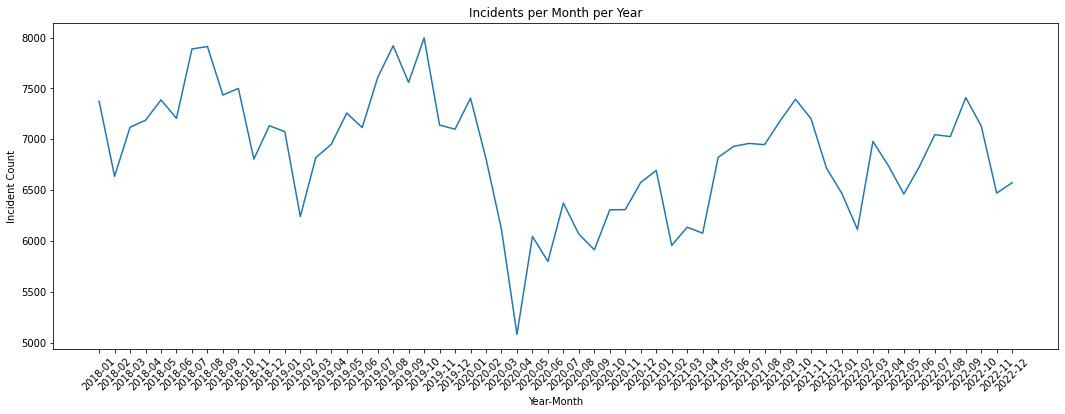

In [29]:
# shows the number of incidents per month per year (includes all incident types)
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(year_month_groupby['Incident Count'])
ax.set_xlabel('Year-Month')
ax.set_ylabel('Incident Count')
ax.set_title('Incidents per Month per Year')
plt.xticks(rotation=45)
plt.savefig("Output/allincidents.png")
plt.show()

In [30]:
# making dataframes based on type of crime
violent_crimes = ["Assault", "Larceny Theft", "Burglary", "Motor Vehicle Theft", "Robbery",
                  "Weapons Offense", "Arson", "Rape", "Homicide",
                  "Human Trafficking"]

nonviolent_crimes = ["Malicious Mischeif", "Other Miscellaneous", "Fraud", "Drug Offense",
                     "Disorderly Conduct", "Offences Against The Family And Children",
                     "Traffic Violation Arrest", "Weapons Carrying Etc",
                     "Stolen Property", "Forgery and Counterfeiting", "Traffic Collision",
                     "Vandalism", "Prostitution", "Embezzlement", "Civil Sidewalks",
                     "Sex Offense", "Drug Violation", "Malicious Mischief", "Gambling"]

misc_disturbance = ["Liquor Laws ", "Missing Person", "Suspicious Activity", "Miscellaneous Investigation",
        "Other Offenses", "Courtesy Report", "Fire Report", "Vehicle Impounded", "Suicide"]

get_rid_of = ["Non-Criminal", "Recovered Vehicles", "Lost Property", "Warrant", "Other", 
              "Case Closure", "Vehicle Misplaced"]


violent_crimes_df = incident_reports.loc[incident_reports["Incident Category"].isin(violent_crimes)]
nonviolent_crimes_df = incident_reports.loc[incident_reports["Incident Category"].isin(nonviolent_crimes)]
misc_disturbance_df = incident_reports.loc[incident_reports["Incident Category"].isin(misc_disturbance)]

In [32]:
# count of crimes by neighborhood
neighborhood = police_reports["Analysis Neighborhood"].value_counts()
neighborhood = pd.DataFrame(neighborhood)
neighborhood = neighborhood.rename(columns = {"Analysis Neighborhood": "Overall Count"})
neighborhood.head()

,Overall Count
Mission,43551
Tenderloin,36914
Financial District/South Beach,35342
South of Market,31370
Bayview Hunters Point,27596


In [33]:
# violent crime counts per neighborhood
violent_count = violent_crimes_df["Analysis Neighborhood"].value_counts()
violent_count = pd.DataFrame(violent_count)
violent_count = violent_count.rename(columns = {"Analysis Neighborhood": "Violent Count"})
violent_count.head()

,Violent Count
Mission,21427
Financial District/South Beach,20291
Tenderloin,16064
South of Market,14433
Bayview Hunters Point,13722


In [34]:
# non-violent crime counts per neighborhood
nonviolent_count = nonviolent_crimes_df["Analysis Neighborhood"].value_counts()
nonviolent_count = pd.DataFrame(nonviolent_count)
nonviolent_count = nonviolent_count.rename(columns = {"Analysis Neighborhood": "Non-Violent Count"})
nonviolent_count.head()

,Non-Violent Count
Mission,12223
Tenderloin,11157
Financial District/South Beach,9119
South of Market,8886
Bayview Hunters Point,7558


In [35]:
# merging by neighborhood index
merge_df = pd.concat([neighborhood, violent_count, nonviolent_count], axis=1)
merge_df.head()

,Overall Count,Violent Count,Non-Violent Count
Mission,43551,21427,12223
Tenderloin,36914,16064,11157
Financial District/South Beach,35342,20291,9119
South of Market,31370,14433,8886
Bayview Hunters Point,27596,13722,7558


In [36]:
# calculating the percentages of violent and non-violent crime
percent_violent = merge_df['Violent Count'] / merge_df['Overall Count'] * 100
percent_nonviolent = merge_df['Non-Violent Count'] / merge_df['Overall Count'] * 100 

merge_df["% Violent"] = percent_violent
merge_df['% Non-Violent'] = percent_nonviolent

merge_df

,Overall Count,Violent Count,Non-Violent Count,% Violent,% Non-Violent
Mission,43551,21427,12223,49.199789,28.065946
Tenderloin,36914,16064,11157,43.517365,30.224305
Financial District/South Beach,35342,20291,9119,57.413276,25.802162
South of Market,31370,14433,8886,46.008926,28.326427
Bayview Hunters Point,27596,13722,7558,49.724598,27.388027
Sunset/Parkside,13782,6065,3834,44.006675,27.818894
North Beach,13301,8240,2896,61.950229,21.772799
Western Addition,12451,6422,3283,51.578186,26.367360
Nob Hill,12137,5953,3405,49.048365,28.054709
Castro/Upper Market,12056,6383,3214,52.944592,26.658925


In [37]:
# violent crimes per month per year
violent_crime_groupby = violent_crimes_df.groupby(violent_crimes_df['Incident Year-Month']).count()['Incident Datetime']
violent_crime_groupby = pd.DataFrame(violent_crime_groupby)
violent_crime_groupby.columns = ['Crime Count']
violent_crime_groupby.head()

,Crime Count
Incident Year-Month,
2018-01,3715
2018-02,3181
2018-03,3432
2018-04,3450
2018-05,3736


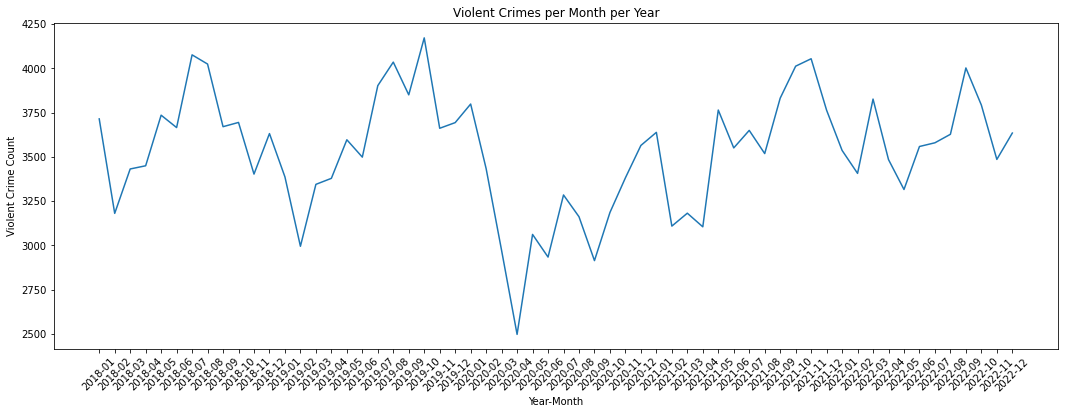

In [38]:
# violent crimes plot
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(violent_crime_groupby['Crime Count'])
ax.set_xlabel('Year-Month')
ax.set_ylabel('Violent Crime Count')
ax.set_title('Violent Crimes per Month per Year')
plt.xticks(rotation=45)
plt.savefig("Output/violentcrimecount.png")
plt.show()

In [40]:
# nonviolent crimes per month per year
nonviolent_groupby = nonviolent_crimes_df.groupby(nonviolent_crimes_df['Incident Year-Month']).count()['Incident Datetime']
nonviolent_groupby = pd.DataFrame(nonviolent_groupby)
nonviolent_groupby.columns = ['Crime Count']
nonviolent_groupby.head()

,Crime Count
Incident Year-Month,
2018-01,1907
2018-02,1756
2018-03,1924
2018-04,1953
2018-05,1893


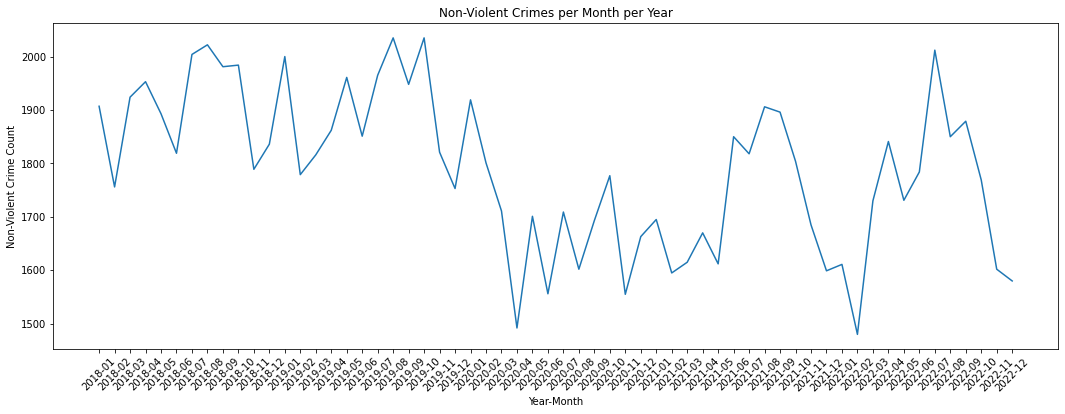

In [41]:
# nonviolent crimes plot
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(nonviolent_groupby['Crime Count'])
ax.set_xlabel('Year-Month')
ax.set_ylabel('Non-Violent Crime Count')
ax.set_title('Non-Violent Crimes per Month per Year')
plt.xticks(rotation=45)
plt.savefig("Output/nonviolentcrimecount.png")
plt.show()

In [42]:
# miscellaneous incidents per month per year
misc_incidents_groupby = misc_disturbance_df.groupby(misc_disturbance_df['Incident Year-Month']).count()['Incident Datetime']
misc_incidents_groupby = pd.DataFrame(misc_incidents_groupby)
misc_incidents_groupby.columns = ['Misc. Incident Count']
misc_incidents_groupby.head()

,Misc. Incident Count
Incident Year-Month,
2018-01,632
2018-02,655
2018-03,644
2018-04,632
2018-05,651


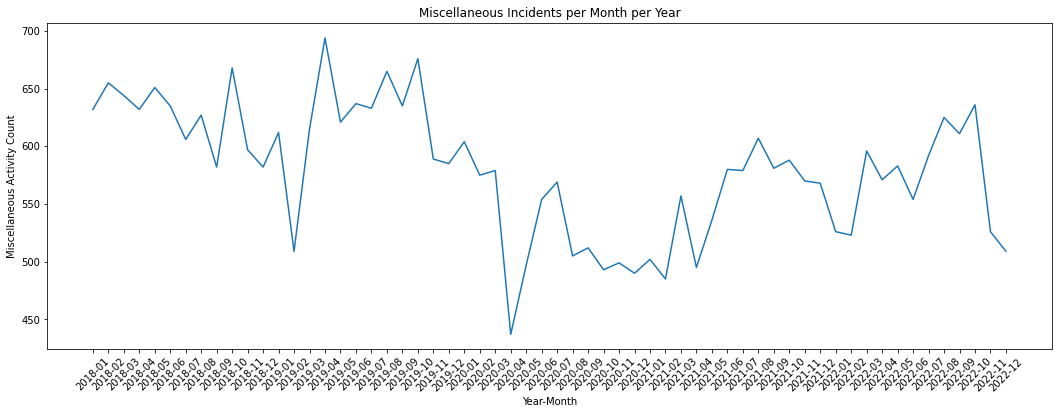

In [43]:
# miscellaneous plot
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(misc_incidents_groupby['Misc. Incident Count'])
ax.set_xlabel('Year-Month')
ax.set_ylabel('Miscellaneous Activity Count')
ax.set_title('Miscellaneous Incidents per Month per Year')
plt.xticks(rotation=45)
plt.savefig("Output/miscellaneouscount.png")
plt.show()

Grouping and Graphing By Date and Neighborhood

In [45]:
incident_reports.dtypes

Incident Datetime           datetime64[ns]
Incident Date                       object
Incident Year                        int64
Incident Day of Week                object
Report Datetime             datetime64[ns]
Report Type Description             object
Filed Online                          bool
Incident Category                   object
Incident Subcategory                object
Incident Description                object
Resolution                          object
Intersection                        object
Police District                     object
Analysis Neighborhood               object
Latitude                           float64
Longitude                          float64
Incident Time                       object
Report Time                         object
Report Date                         object
Response Time              timedelta64[ns]
Incident Year-Month                 object
Report Year-Month                   object
dtype: object

In [46]:
incident_dtypes = incident_reports.astype({'Analysis Neighborhood': str})
incident_dtypes = incident_reports.astype({'Incident Year-Month': str})

In [47]:
incident_dtypes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411298 entries, 0 to 411297
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype          
---  ------                   --------------   -----          
 0   Incident Datetime        411298 non-null  datetime64[ns] 
 1   Incident Date            411298 non-null  object         
 2   Incident Year            411298 non-null  int64          
 3   Incident Day of Week     411298 non-null  object         
 4   Report Datetime          411298 non-null  datetime64[ns] 
 5   Report Type Description  411298 non-null  object         
 6   Filed Online             411298 non-null  bool           
 7   Incident Category        411298 non-null  object         
 8   Incident Subcategory     411298 non-null  object         
 9   Incident Description     411298 non-null  object         
 10  Resolution               411298 non-null  object         
 11  Intersection             411298 non-null  object         
 12  Po

In [49]:
neighborhood_all_groupby = incident_dtypes.groupby(['Incident Year-Month', 'Analysis Neighborhood']).count()['Incident Datetime']
neighborhood_all_groupby = pd.DataFrame(neighborhood_all_groupby)
neighborhood_all_groupby.columns = ['Incident Count']
neighborhood_all_groupby

Incident Count
Incident Year-Month Analysis Neighborhood                
2018-01             Bayview Hunters Point             476
                    Bernal Heights                    163
                    Castro/Upper Market               210
                    Chinatown                         196
                    Excelsior                         162
...                                                   ...
2022-12             Treasure Island                    25
                    Twin Peaks                         25
                    Visitacion Valley                  96
                    West of Twin Peaks                114
                    Western Addition                  207

[2460 rows x 1 columns]

/Users/megvogel/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/megvogel/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


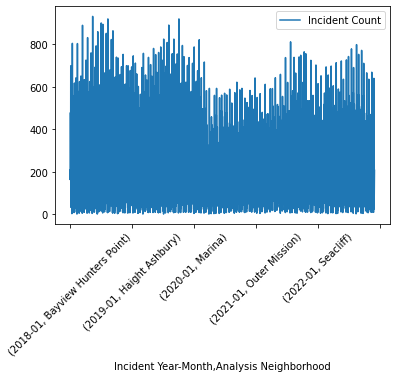

In [50]:
# crime count by year-month and neighborhood
neighborhood_all_groupby.plot()
# ax.set_xlabel('Year-Month')
ax.set_ylabel('Incident Count')
ax.set_title('Crime Count by Date and Neighborhood')
ax.set_xticklabels('Analysis Neighborhood')
plt.xticks(rotation=45)
plt.show()

In [51]:
# making a pivot table to graph by datetime
neighborhood_groupby = pd.pivot_table(data=incident_dtypes, index=incident_dtypes['Analysis Neighborhood'],
                                         columns=incident_dtypes['Incident Year-Month'], values=['Incident Datetime'], 
                                     aggfunc='count')
neighborhood_groupby

Incident Datetime                          \
Incident Year-Month                      2018-01 2018-02 2018-03 2018-04   
Analysis Neighborhood                                                      
Bayview Hunters Point                        476     397     420     460   
Bernal Heights                               163     111     127     137   
Castro/Upper Market                          210     165     230     214   
Chinatown                                    196     176     127     151   
Excelsior                                    162     166     154     130   
Financial District/South Beach               699     642     651     726   
Glen Park                                     33      30      32      51   
Golden Gate Park                              88      57      54      59   
Haight Ashbury                               108     110      95     108   
Hayes Valley                                 194     122     131     179   
Inner Richmond                                99      98      93     115   
Inner Sunset                                  95      83      91      82   
Japantown                                     77      42      75      57   
Lakeshore                                    101      94     115      82   
Lincoln Park                                   3       1       6       5   
Lone Mountain/USF                            102      91     111     119   
Marina                                       147     147     175     133   
McLaren Park                                   6       6       6      11   
Mission                                      805     804     890     832   
Mission Bay                                  138     100     141     133   
Nob Hill                                     214     177     193     219   
Noe Valley                                    81      65      57      74   
North Beach                                  228     213     234     213   
Oceanview/Merced/Ingleside                   121      70     105      95   
Outer Mission                                120     110      95      95   
Outer Richmond                               169     125     149     155   
Pacific Heights                              129      85      97     103   
Portola                                      110      66      91      82   
Potrero Hill                                 114     100     105     111   
Presidio                                      16      11      26      14   
Presidio Heights                              45      53      36      39   
Russian Hill                                 186     158     158     167   
Seacliff                                       8       5       9       6   
South of Market                              559     579     634     578   
Sunset/Parkside                              219     280     289     292   
Tenderloin                                   618     625     589     625   
Treasure Island                               10      28      35      41   
Twin Peaks                                    33      12      24      18   
Visitacion Valley                             99      95     110     104   
West of Twin Peaks                           168     149     143     178   
Western Addition                             225     188     215     194   

                                                                        \
Incident Year-Month            2018-05 2018-06 2018-07 2018-08 2018-09   
Analysis Neighborhood                                                    
Bayview Hunters Point              444     442     461     445     448   
Bernal Heights                     149     124     163     144     117   
Castro/Upper Market                252     256     237     260     212   
Chinatown                          160     183     183     170     195   
Excelsior                          126     127     163     163     122   
Financial District/South Beach     760     793     901     852     823   
Glen Park           

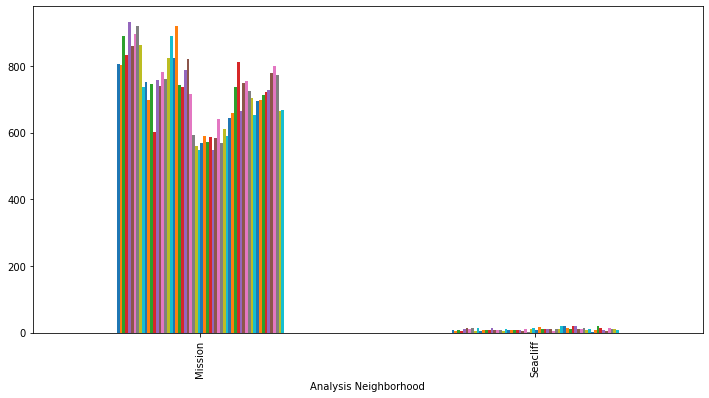

In [52]:
# showing the distribution of crimes per month for the best and worst neighborhood
select_neighborhoods = neighborhood_groupby.loc[neighborhood_groupby.index.isin(['Mission', 'Seacliff'])]
ax = select_neighborhoods.plot(kind='bar', figsize=(12, 6), legend=None)
plt.show()

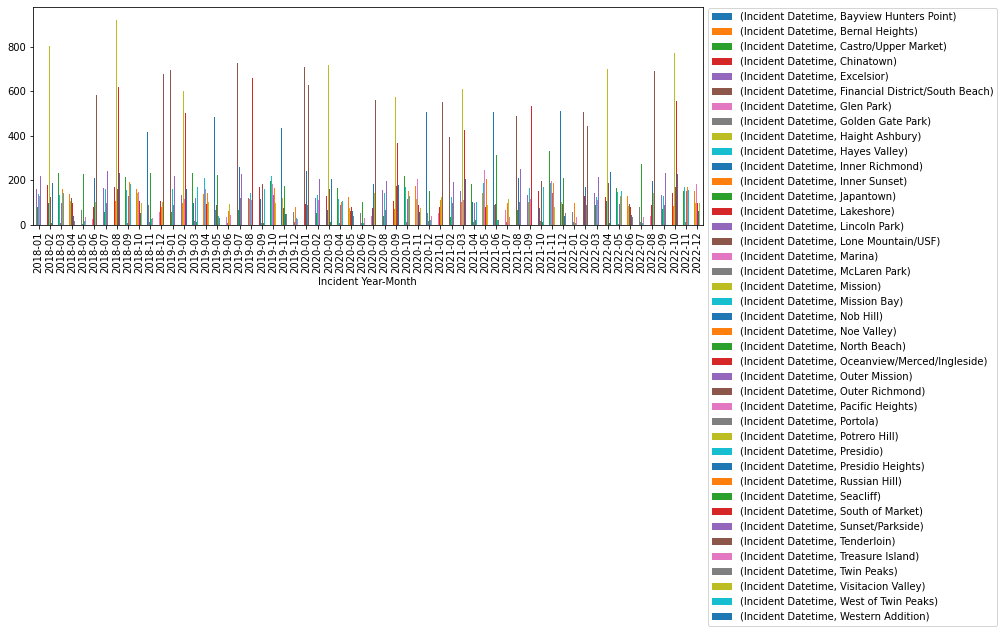

In [53]:
# switiching the axes just in case
neighborhood_groupby2 = pd.pivot_table(data=incident_dtypes, index=incident_dtypes['Incident Year-Month'],
                                         columns=incident_dtypes['Analysis Neighborhood'], values=['Incident Datetime'], 
                                     aggfunc='count')

ax = neighborhood_groupby2.plot(kind='bar', figsize=(12, 4))
_ = ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()